# Einführung in die Informationstheorie

Willkommen zu diesem Jupyter-Notebook über **Informationskompression**! Hier werden wir verschiedene Methoden der Datenkompression anhand praktischer Beispiele untersuchen.

Datenkompression ist der Prozess, durch den die Größe einer Datei oder eines Datensatzes reduziert wird. Dies wird oft erreicht, indem redundante Informationen entfernt oder effizienter codiert werden. Die Kompression kann entweder _verlustfrei_ sein, bei der keine Daten verloren gehen, oder _verlustbehaftet_, bei der einige Daten zugunsten einer stärkeren Kompressionsrate verloren gehen.

In diesem Notebook werden wir:

1. Den Komprimierungsprozess von Textdateien mittels ZIP-Komprimierung untersuchen.
1. Den Einfluss von zufälligen Daten auf die Kompressionsrate beobachten.
1. Den Unterschied in der Dateigröße zwischen verschiedenen Bildformaten (BMP, ZIP und JPEG) vergleichen.


Durch diese Experimente erhalten Sie ein besseres Verständnis dafür, wie Datenkompression funktioniert und warum sie in der digitalen Welt so wichtig ist.

**Viel Spaß beim Erkunden!**


## Beispiel 1: Englischer Text komprimieren

Im ersten Beispiel werden wir eine Textdatei mit englischer Sprache komprimieren und die Filegröße mit vor und nach der Kompression vergleichen.


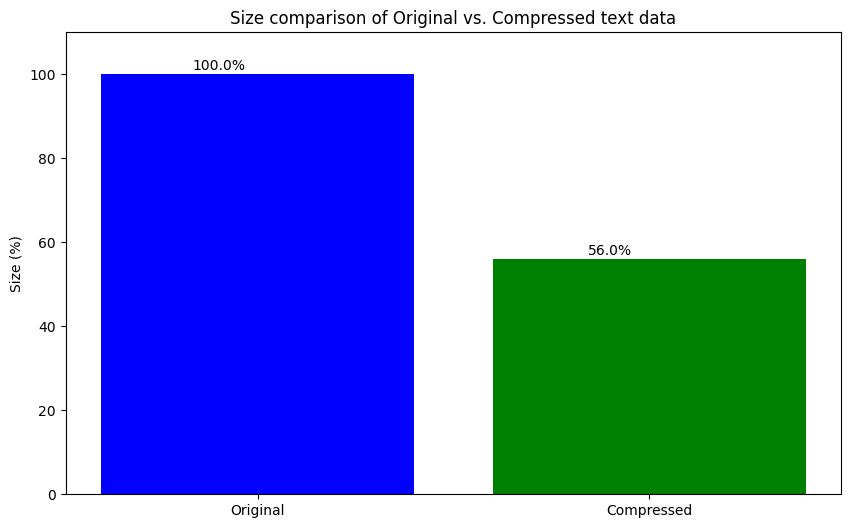

Original Size: 9.16 KB
Compressed Size: 5.13 KB


In [4]:
# First, let's import the necessary libraries
import gzip
import io
import matplotlib.pyplot as plt
from js import fetch

# example retrieving the default html file on the demo website

# Load the big text file from the URL
filename = "data/big.txt"
res = await fetch(filename)
text_data = await res.text()

original_size = len(text_data.encode('utf-8'))  # Getting the size in bytes

# Now, let's compress the text data using gzip
buffer = io.BytesIO()  # Creating an in-memory binary stream
with gzip.GzipFile(fileobj=buffer, mode='wb') as f:
    f.write(text_data.encode('utf-8'))

compressed_data = buffer.getvalue()
compressed_size = len(compressed_data)

# Calculating the percentage size of the compressed data relative to the original
compressed_percentage = (compressed_size / original_size) * 100

# Data for plotting
labels = ['Original', 'Compressed']
sizes = [100, compressed_percentage]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=['blue', 'green'])

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2. - 0.1, height + 1, f"{height:.1f}%", ha='center', color='black')

plt.ylabel('Size (%)')
plt.title('Size comparison of Original vs. Compressed text data')
plt.ylim(0, 110)  # Set y-axis limits to fit the 100% label
plt.show()

print(f"Original Size: {original_size / (1024):.2f} KB")
print(f"Compressed Size: {compressed_size / (1024):.2f} KB")


## Beispiel 2: Zufällige Daten und Kompression

Ein interessantes Experiment zur Datenkompression ist das Komprimieren von Daten, die völlig zufällig sind. Da Kompressionsalgorithmen redundante Informationen identifizieren und codieren, um Speicherplatz zu sparen, sollten zufällige Daten, die per Definition keine Redundanz enthalten, nicht gut komprimiert werden können.

In diesem Beispiel erzeugen wir eine Datei mit zufälligen Bits derselben Größe wie unsere ursprüngliche Textdatei und versuchen dann, sie zu komprimieren. Die Erwartung ist, dass die Größe der komprimierten Datei nahe an der Größe der ursprünglichen Datei liegt.


Original Random Data Size: 0.0089 MB
Compressed Random Data Size: 0.0090 MB


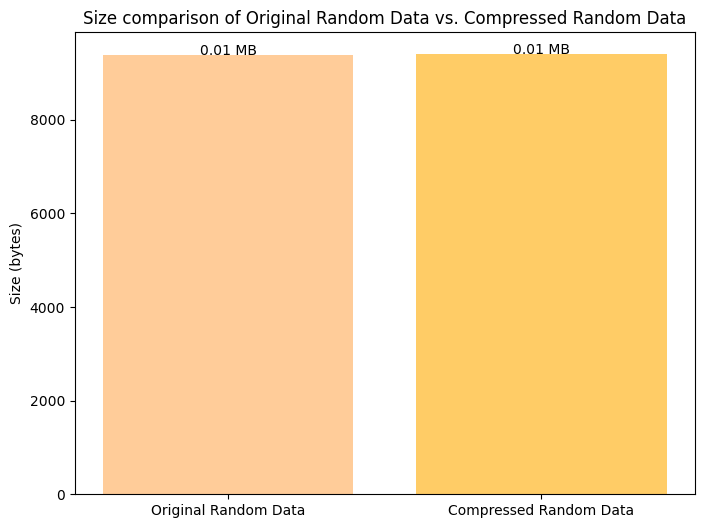

In [9]:
import io
import random
import gzip
import matplotlib.pyplot as plt
import numpy as np

# Assuming you still have the original_size variable from before
# Create a file with random bits of the same size as the original text data
random_bits = ''.join(['1' if random.randint(0, 1) else '0' for _ in range(original_size * 8)])  # original_size * 8 because we're generating bits
random_data = int(random_bits, 2).to_bytes((len(random_bits) + 7) // 8, byteorder='big')

# Make the data length a multiple of 3
random_data = random_data[:len(random_data) // 3 * 3]

# Divide the data into 3-byte chunks and count bits

counts = [sum(bin(b).count("1") for b in three_bytes) for three_bytes in np.frombuffer(random_data, dtype=np.uint8).reshape(-1, 3)]

# Create an in-memory binary stream for the random bits
in_memory_file = io.BytesIO()
in_memory_file.write(random_data)

# Now, let's compress the random bits data using gzip
buffer = io.BytesIO()  # Creating another in-memory binary stream for the compressed data
with gzip.GzipFile(fileobj=buffer, mode='wb') as f:
    f.write(random_data)

compressed_random_data = buffer.getvalue()
compressed_random_size = len(compressed_random_data)

# Now, let's compare sizes
print(f"Original Random Data Size: {original_size / (1024*1024):.4f} MB")
print(f"Compressed Random Data Size: {compressed_random_size / (1024*1024):.4f} MB")

# Let's visualize the size comparison using matplotlib
labels = ['Original Random Data', 'Compressed Random Data']
sizes = [original_size, compressed_random_size]
colors = ['#ffcc99','#ffcc66']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f"{height / (1024*1024):.2f} MB", ha='center', color='black')

plt.ylabel('Size (bytes)')
plt.title('Size comparison of Original Random Data vs. Compressed Random Data')
plt.show()


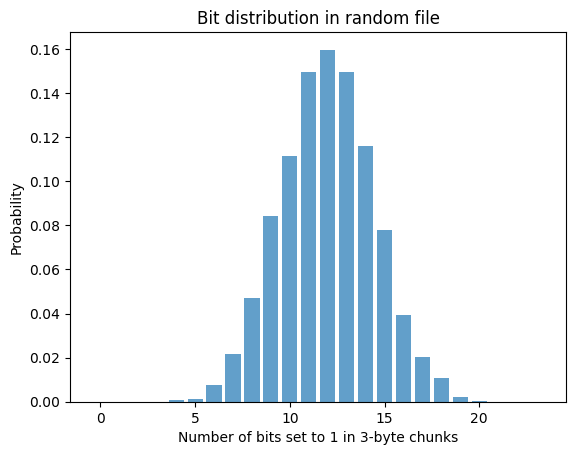

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Make the data length a multiple of 3

# Ensure the length is a multiple of 3
random_data = random_data[:len(random_data) - len(random_data) % 3]

# Count the bits for each 3-byte chunk
counts = [sum(bin(b).count("1") for b in three_bytes) for three_bytes in np.frombuffer(random_data, dtype=np.uint8).reshape(-1, 3)]

# 3. Accumulate into histogram
hist, edges = np.histogram(counts, bins=range(25), density=True)

# 4. Plot the histogram
plt.bar(edges[:-1], hist, width=0.8, align='center', alpha=0.7)
plt.xlabel('Number of bits set to 1 in 3-byte chunks')
plt.ylabel('Probability')
plt.title('Bit distribution in random file')
plt.show()


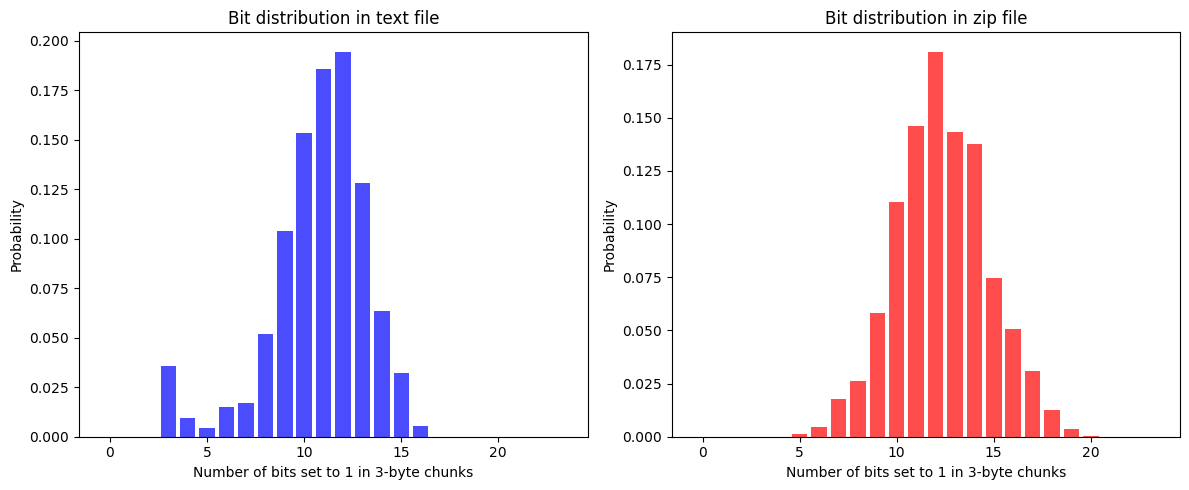

In [74]:
# Make the data length a multiple of 3

# Ensure the length is a multiple of 3
text_data_bytes = text_data.encode()
text_data_bytes = text_data_bytes[:len(text_data_bytes) - len(text_data_bytes) % 3]

# Ensure the length is a multiple of 3
zip_data = compressed_data[:len(compressed_data) - len(compressed_data) % 3]

# Count the bits for each 3-byte chunk for the zip file and text file
zip_counts = [sum(bin(b).count("1") for b in three_bytes) for three_bytes in np.frombuffer(zip_data, dtype=np.uint8).reshape(-1, 3)]

counts = [sum(bin(b).count("1") for b in three_bytes) for three_bytes in np.frombuffer(text_data_bytes, dtype=np.uint8).reshape(-1, 3)]

# 3. Accumulate into histogram
text_hist, text_edges = np.histogram(counts, bins=range(25), density=True)
zip_hist, zip_edges = np.histogram(zip_counts, bins=range(25), density=True)

# Plot the histograms side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(text_edges[:-1], text_hist, width=0.8, align='center', alpha=0.7, color='blue')
ax[0].set_xlabel('Number of bits set to 1 in 3-byte chunks')
ax[0].set_ylabel('Probability')
ax[0].set_title('Bit distribution in text file')

ax[1].bar(zip_edges[:-1], zip_hist, width=0.8, align='center', alpha=0.7, color='red')
ax[1].set_xlabel('Number of bits set to 1 in 3-byte chunks')
ax[1].set_ylabel('Probability')
ax[1].set_title('Bit distribution in zip file')

plt.tight_layout()
plt.show()


In [ ]:
# Make the data length a multiple of 3

# Ensure the length is a multiple of 3
text_data_bytes = text_data.encode()
text_data_bytes = text_data_bytes[:len(text_data_bytes) - len(text_data_bytes) % 3]

# Count the bits for each 3-byte chunk
counts = [sum(bin(b).count("1") for b in three_bytes) for three_bytes in np.frombuffer(text_data_bytes, dtype=np.uint8).reshape(-1, 3)]

# 3. Accumulate into histogram
hist, edges = np.histogram(counts, bins=range(25), density=True)

# 4. Plot the histogram
plt.bar(edges[:-1], hist, width=0.8, align='center', alpha=0.7)
plt.xlabel('Number of bits set to 1 in 3-byte chunks')
plt.ylabel('Probability')
plt.title('Bit distribution in text file')
plt.show()

## Beispiel 3: Bildkompression

Bilder können große Mengen an Daten enthalten, besonders wenn sie im BMP-Format gespeichert sind, das eine verlustfreie Bitmap-Darstellung des Bildes bietet. Es gibt jedoch viele Bildkomprimierungsformate, die es ermöglichen, den Speicherplatz erheblich zu reduzieren, oft mit einem gewissen Verlust an Bildqualität.

In diesem Beispiel betrachten wir ein Bild im BMP-Format und vergleichen seine Größe mit der Größe derselben Datei, wenn sie als ZIP (verlustfrei) und JPEG (verlustbehaftet) gespeichert wird.

- **ZIP**: Ein allgemeines Dateikompressionsformat, das verlustfrei ist. Während es effizient bei vielen Text- und Datenformaten ist, ist es oft nicht das beste Format für Bilder.
  
- **JPEG**: Ein spezifisches Bildkompressionsformat, das verlustbehaftet ist. Es reduziert die Dateigröße durch Entfernen von Informationen, die für das menschliche Auge weniger wahrnehmbar sind. Mit dem `quality`-Parameter können Sie den Kompressionsgrad und die resultierende Bildqualität steuern.

Durch den Vergleich dieser Formate können Sie ein Verständnis dafür bekommen, wie unterschiedliche Kompressionsmethoden den Speicherbedarf und die Qualität eines Bildes beeinflussen.

Wir laden zunächst eine unkompimierte PNG Datei.

In [7]:
import io
import gzip
import matplotlib.pyplot as plt
from PIL import Image
import zipfile

# Step 1: Fetch the BMP image from the given URL
url = "data/test.png"
image = Image.open(url)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # hide axes
plt.show()

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'data/test.png'

Speichern diese als unkomprimierte BMP Datei.

In [47]:
# Step 2: Save it as an in-memory BMP file
in_memory_bmp = io.BytesIO()
image.save(in_memory_bmp, format="BMP")
in_memory_bmp.seek(0)  # Reset position to start before reading
bmp_data = in_memory_bmp.read()
bmp_size = in_memory_bmp.tell()  # get the current file size
theoretical_size=image.width*image.height*3
print(f"Theoretical size = Image width x Image height x 3 Byte = {image.width} x {image.height} x 3 Byte = {theoretical_size}")

print(f"matches actual size of {bmp_size / (1024*1024):.2f} MB")


Theoretical size = Image width x Image height x 3 Byte = 563 x 1000 x 3 Byte = 1689000
matches actual size of 1.61 MB


Dieses Bild können wir nun zippen und auch jpeg komprimieren.

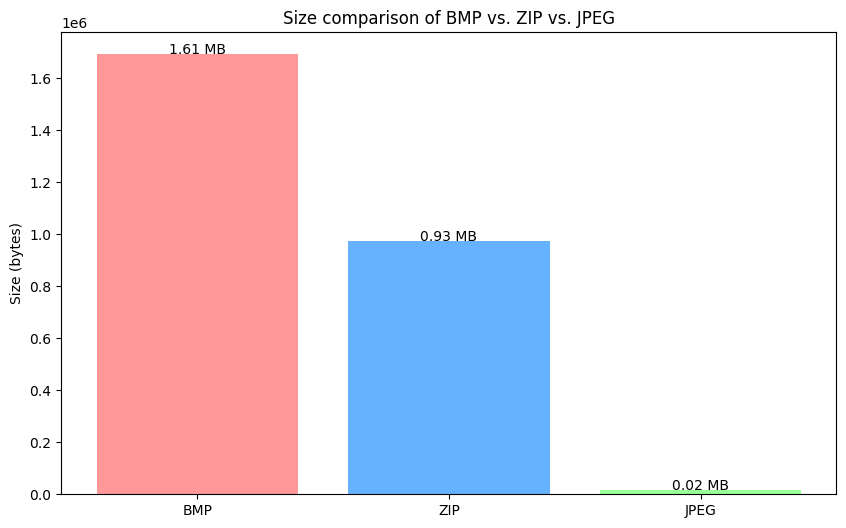

In [48]:

# Step 3: Compress it into an in-memory ZIP file
in_memory_zip = io.BytesIO()
with zipfile.ZipFile(in_memory_zip, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    with zipf.open("test.bmp", 'w') as file:
        file.write(bmp_data)
zip_size = in_memory_zip.tell()

# Step 4: Convert and save it as an in-memory JPEG file
in_memory_jpeg = io.BytesIO()
image.save(in_memory_jpeg, format="JPEG", quality=10)
jpeg_size = in_memory_jpeg.tell()

# Step 5: Compare and visualize the sizes
labels = ['BMP', 'ZIP', 'JPEG']
sizes = [bmp_size, zip_size, jpeg_size]
colors = ['#ff9999','#66b2ff','#99ff99']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=colors)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f"{height / (1024*1024):.2f} MB", ha='center', color='black')

plt.ylabel('Size (bytes)')
plt.title('Size comparison of BMP vs. ZIP vs. JPEG')
plt.show()


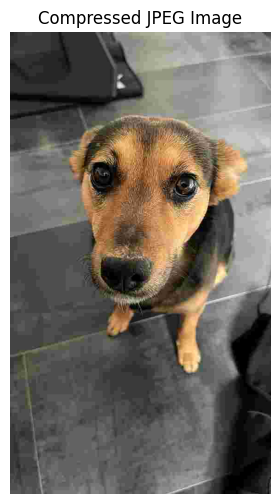

In [49]:
# Display the compressed JPEG image
in_memory_jpeg.seek(0)
jpeg_image = Image.open(in_memory_jpeg)
plt.figure(figsize=(6, 6))
plt.imshow(jpeg_image)
plt.title('Compressed JPEG Image')
plt.axis('off')  # hide axes
plt.show()

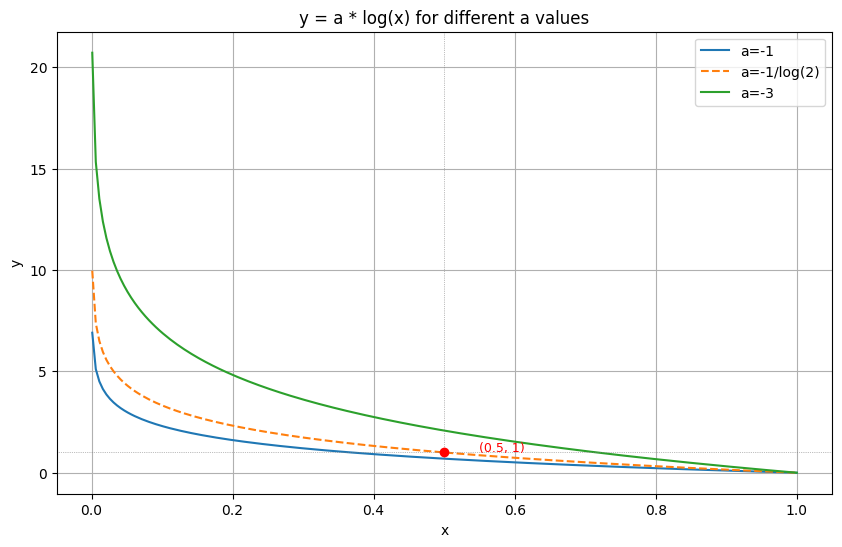

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, a):
    return a * np.log(x)

# Generate x values
x = np.linspace(0.001, 1, 200)  # Start from 0.001 to avoid log(0)

# Plot the function for different a values
plt.figure(figsize=(10,6))
plt.plot(x, f(x, -1), label="a=-1")
plt.plot(x, f(x, -1/np.log(2)), label="a=-1/log(2)", linestyle='--')
plt.plot(x, f(x, -3), label="a=-3")
# Add vertical and horizontal lines for x=0.5 and y=1
plt.axvline(0.5, color='gray', linestyle=':', linewidth=0.5)
plt.axhline(1, color='gray', linestyle=':', linewidth=0.5)

# Highlight the point (0.5, 1)
plt.scatter([0.5], [1], color='red', zorder=5)
plt.text(0.55, 1.05, '(0.5, 1)', fontsize=9, color='red')
# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = a * log(x) for different a values')
plt.legend()
plt.grid(True)
plt.show()